In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import scipy
import MDAnalysis


In [2]:
import dengue_utility_functions

In [3]:
#load full set of skip-10 compact-representation processed sim126 extended (dengue 5-10 microseconds at 323 K) trajectory data:
#now updating to use the properly processed trajectory (as was used for Voronoi analysis):
gro_file_path = '/sansom/n22/bioc1009/sim126_extended/sim126_insect_dengue_323K_extended.part0026.gro'
list_xtc_file_paths = ['/sansom/n22/bioc1009/sim126_extended/translated_test.xtc']
universe_object = MDAnalysis.Universe(gro_file_path,list_xtc_file_paths)

In [5]:
#confirm that there are about 5000 frames (at 1 ns/ frame; 5 microseconds total):
universe_object.trajectory.numframes

5001

In [6]:
#to prepare for diffusion analysis, load my github-hosted diffusion module:
import sys; sys.path.append('/sansom/sc2/bioc1009/github_projects/diffusion_utility/diffusion_analysis_MD_simulations')
import diffusion_analysis

In [7]:
window_size_list_frames = [1,3,5,10,25,50,100,200,300,400,500] #window sizes of 1 ns to 500 ns (because skip 10 filtered data has frame : nanosecond 1 : 1 correspondence)
dict_particle_selection_strings = {'POPC':'resname POPC','PPCE':'resname PPCE','DPPE':'resname DPPE','CER':'resname CER','DUPC':'resname DUPC','DOPS':'resname DOPS','PPCS':'resname PPCS'} #all lipids in the dengue simulation system
dict_MSD_values = diffusion_analysis.mean_square_displacement_by_species(gro_file_path,list_xtc_file_paths,window_size_list_frames,dict_particle_selection_strings)

In [8]:
#I want linear and non-linear diffusion fit data for each lipid type
dict_MSD_data_combined = {} #populate this dictionary with linear and non-linear fit results for each lipid type
for lipid_name in dict_particle_selection_strings.keys():
    time_window_array = numpy.array(window_size_list_frames)
    MSD_data_array = numpy.array(dict_MSD_values['MSD_value_dict'][lipid_name])
    linear_results_tuple = diffusion_analysis.fit_linear_diffusion_data(time_window_array,MSD_data_array)
    anomalous_results_tuple = diffusion_analysis.fit_anomalous_diffusion_data(time_window_array,MSD_data_array)
    dict_MSD_data_combined[lipid_name] = {'linear_results_tuple':linear_results_tuple,'anomalous_results_tuple':anomalous_results_tuple}
    

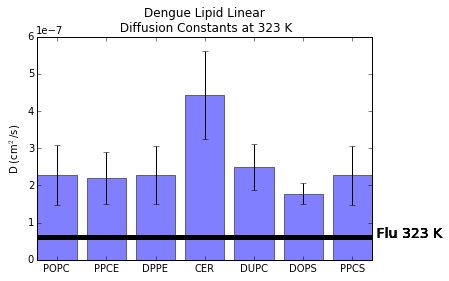

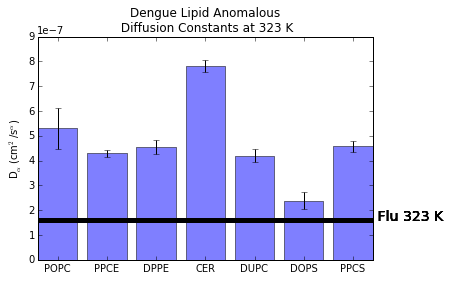

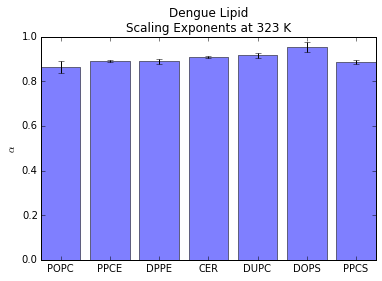

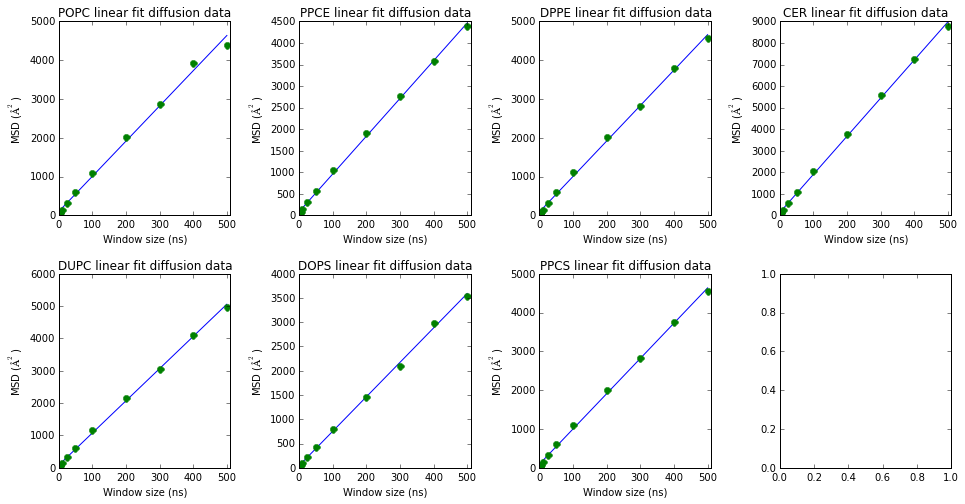

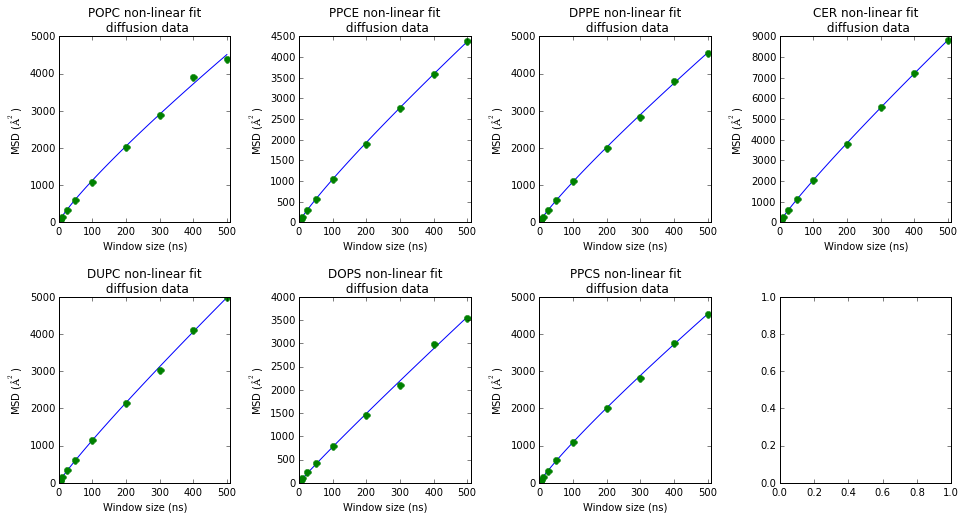

In [9]:
#now, I need to write a plotting loop I think (and convert values to appropriate units)
fig_linear_D_constants = plt.figure()
fig_anomalous_D_constants = plt.figure()
fig_anomalous_alpha_values = plt.figure()
fig_linear_data_fit = plt.figure()
fig_anomalous_data_fit = plt.figure()
ax_linear_D_constants = fig_linear_D_constants.add_subplot(111)
ax_anomalous_D_constants = fig_anomalous_D_constants.add_subplot(111)
ax_anomalous_alpha_values = fig_anomalous_alpha_values.add_subplot(111)
bar_x_position = 0
width = 0.8
list_x_species_categories = []
list_x_ticks = []
data_fit_subplot_number = 1
ax_linear_data_fit = fig_linear_data_fit.add_subplot(2,4,data_fit_subplot_number)
ax_anomalous_data_fit = fig_anomalous_data_fit.add_subplot(2,4,data_fit_subplot_number)

for lipid_name,results_subdictionary in dict_MSD_data_combined.iteritems():
    linear_results_tuple = results_subdictionary['linear_results_tuple']
    anomalous_results_tuple = results_subdictionary['anomalous_results_tuple']
    
    ax_linear_D_constants.bar(bar_x_position,linear_results_tuple[0]/(10**7),yerr=linear_results_tuple[1]/(10**7),ecolor='black',alpha=0.5)
    list_x_species_categories.append(lipid_name)
    list_x_ticks.append(bar_x_position + (width/2.))
    ax_linear_D_constants.set_xticks(list_x_ticks)
    ax_linear_D_constants.set_xticklabels(list_x_species_categories)
    ax_linear_D_constants.set_title('Dengue Lipid Linear\n Diffusion Constants at 323 K')
    ax_linear_D_constants.set_ylabel('D (cm$^2$/s)')
    ax_linear_D_constants.axhline(y=0.6*(10**-7),xmin=0.0,xmax=1.0,lw=5,color='black',alpha=0.5) #to indicate D constant for FORS flu virion at 323 K (linear fit)
    ax_linear_D_constants.annotate(' Flu 323 K',xy=(6.8,0.6*(10**-7)),size=14,color='black')
    
    ax_anomalous_D_constants.bar(bar_x_position,anomalous_results_tuple[0]/(10**7),yerr=anomalous_results_tuple[1]/(10**7),ecolor='black',alpha=0.5)
    ax_anomalous_D_constants.set_xticks(list_x_ticks)
    ax_anomalous_D_constants.set_xticklabels(list_x_species_categories)
    ax_anomalous_D_constants.set_title('Dengue Lipid Anomalous\n Diffusion Constants at 323 K')
    ax_anomalous_D_constants.set_ylabel('D$_{\\alpha}$ (cm$^2$/s$^{\\alpha}$)')
    ax_anomalous_D_constants.axhline(y=1.6*(10**-7),xmin=0.0,xmax=1.0,lw=5,color='black',alpha=0.5) #to indicate D constant for FORS flu virion at 323 K (non-linear fit)
    ax_anomalous_D_constants.annotate(' Flu 323 K',xy=(6.8,1.6*(10**-7)),size=14,color='black')
    
    ax_anomalous_alpha_values.bar(bar_x_position,anomalous_results_tuple[2],yerr=anomalous_results_tuple[3],ecolor='black',alpha=0.5)
    ax_anomalous_alpha_values.set_xticks(list_x_ticks)
    ax_anomalous_alpha_values.set_xticklabels(list_x_species_categories)
    ax_anomalous_alpha_values.set_title('Dengue Lipid \nScaling Exponents at 323 K')
    ax_anomalous_alpha_values.set_ylabel('$\\alpha$')
    bar_x_position += 1
    
    ax_linear_data_fit.plot(linear_results_tuple[2],linear_results_tuple[3],'-',window_size_list_frames,dict_MSD_values['MSD_value_dict'][lipid_name],'.',ms=14) 
    ax_linear_data_fit.set_xlabel('Window size (ns)')
    ax_linear_data_fit.set_ylabel('MSD ($\AA^2$)')
    ax_linear_data_fit.set_xlim((0,510))
    ax_linear_data_fit.set_title(lipid_name + ' linear fit diffusion data')
    
    ax_anomalous_data_fit.plot(anomalous_results_tuple[-2],anomalous_results_tuple[-1],'-',window_size_list_frames,dict_MSD_values['MSD_value_dict'][lipid_name],'.',ms=14)
    ax_anomalous_data_fit.set_xlabel('Window size (ns)')
    ax_anomalous_data_fit.set_ylabel('MSD ($\AA^2$)')
    ax_anomalous_data_fit.set_xlim((0,510))
    ax_anomalous_data_fit.set_title(lipid_name + ' non-linear fit\n diffusion data')
    
    data_fit_subplot_number += 1
    ax_linear_data_fit = fig_linear_data_fit.add_subplot(2,4,data_fit_subplot_number)
    ax_anomalous_data_fit = fig_anomalous_data_fit.add_subplot(2,4,data_fit_subplot_number)
    
fig_linear_data_fit.set_size_inches(16,8)
fig_linear_data_fit.subplots_adjust(wspace=0.4,hspace=0.3)
fig_anomalous_data_fit.set_size_inches(16,8)
fig_anomalous_data_fit.subplots_adjust(wspace=0.4,hspace=0.4)

The lipid diffusion constants from the final five $\mu$s of the dengue simulation at 323 K are shown above for both linear and non-linear (anomalous) fits to the MSD vs. time data. All of the lipids exhibited subdiffusive ($\alpha$ < 1) behaviour, which is a special case of anomalous diffusion frequently observed in lipid bilayers. The dengue lipid diffusion constants are only slightly greater than the average lipid diffusion constants for the (+FORS) flu virion simulated at the same temperature. The close apposition of dengue E/M proteins to the lipid bilayer and the presence of 720 transmembrane domains in the viral envelope may explain why the lipids diffuse slowly despite the lack of cholesterol. The influenza A lipid envelope is approximately 52 % cholesterol, but has far fewer protein TMDs and a much larger outer diameter. 

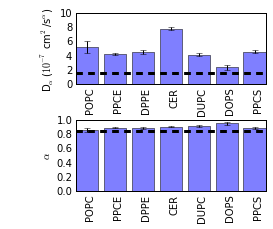

In [26]:
#produce suitable version of Figure 2A (Figure 4 now) for short dengue paper:



fig_2A = plt.figure()
ax = fig_2A.add_subplot('211')
ax_anomalous_alpha_values = fig_2A.add_subplot('212')
bar_x_position = 0.0
width = 0.8
list_x_species_categories = []
list_x_ticks = []

for lipid_name,results_subdictionary in dict_MSD_data_combined.iteritems():
    anomalous_results_tuple = results_subdictionary['anomalous_results_tuple']
    list_x_species_categories.append(lipid_name)
    list_x_ticks.append(bar_x_position + (width/2.) + 0.15)
    ax.bar(bar_x_position,anomalous_results_tuple[0],yerr=anomalous_results_tuple[1],ecolor='black',alpha=0.5)
    ax.set_xticks(list_x_ticks)
    ax.set_yticks([0,2,4,6,8,10])
    ax.set_xticklabels(list_x_species_categories,rotation=90)
    #ax.set_title('Dengue Lipid Anomalous\n Diffusion Constants at 323 K')
    ax.set_ylabel('D$_{\\alpha}$ ($10^{-7}$ cm$^2$/s$^{\\alpha}$)')
    ax.axhline(y=1.6,ls='--',xmin=0.0,xmax=1.0,lw=3,color='black',alpha=0.5) #to indicate D constant for FORS flu virion at 323 K (non-linear fit)
    #ax.annotate(' Flu 323 K',xy=(6.8,1.6*(10**-7)),size=14,color='black')
    ax.tick_params(axis='both',which='both',bottom='off',top='off',left='off',right='off')
    
    ax_anomalous_alpha_values.bar(bar_x_position,anomalous_results_tuple[2],yerr=anomalous_results_tuple[3],ecolor='black',alpha=0.5)
    ax_anomalous_alpha_values.set_xticks(list_x_ticks)
    ax_anomalous_alpha_values.set_xticklabels(list_x_species_categories,rotation=90)
    #ax_anomalous_alpha_values.set_title('Dengue Lipid \nScaling Exponents at 323 K')
    ax_anomalous_alpha_values.set_ylabel('\n\n\n$\\alpha$')
    ax_anomalous_alpha_values.tick_params(axis='both',which='both',bottom='off',top='off',left='off',right='off')
    ax_anomalous_alpha_values.axhline(y=0.85,ls='--',xmin=0.0,xmax=1.0,lw=3,color='black',alpha=0.5)
    
    bar_x_position += 1

fig_2A.set_size_inches(3.3,3.3)
fig_2A.subplots_adjust(left=0.15,right=0.95,bottom=0.15,top=0.9,wspace=0.1,hspace=0.5)
fig_2A.savefig('fig_4.png',dpi=300)


In [104]:
#produce some png files suitable for SysL presentation on October 8/ 2014:
output_path = '/sansom/sc2/bioc1009/postdoc_work/literature/JClub/SysL_October_8_2014/'
for fig in [fig_linear_D_constants,fig_anomalous_D_constants,fig_anomalous_alpha_values]:
    fig.set_size_inches(3.8,3.4)
ax_linear_D_constants.set_title('Linear 323 K')
fig_linear_D_constants.savefig(output_path + 'linear_D.png', dpi=300)
ax_anomalous_D_constants.set_title('Anomalous 323 K')
fig_anomalous_D_constants.savefig(output_path + 'anomalous_D.png',dpi=300)
ax_anomalous_alpha_values.set_title('$\\alpha$ 323 K')
ax_anomalous_alpha_values.set_ylabel('$\\alpha$',size=18)
ax_anomalous_alpha_values.set_xticklabels(list_x_species_categories)
ax_anomalous_alpha_values.set_xticks(list_x_ticks)
ax_anomalous_alpha_values.set_xlabel('')
fig_anomalous_alpha_values.savefig(output_path + 'alpha_values.png',dpi=300)
